
# <center><font style="color:rgb(100,109,254)"> Haar Cascades </font><center>

### <font style="color:rgb(134,19,348)">  So What are these Haar Cascades:     </font> 

So essentially these Haar Cascades also called viola jones Classifiers is an Outdated Object detection propose by Paul Viola and Michael Jones in 2001. It is a machine learning based approach where a cascade is trained from a lot of positive and negative images. It is then used to detect objects in other images.

Consider Face detection, if we were to do it by haar cascades then we would first need to train the algorithm with lots of positive images (images of faces) and negative images (images without faces). After training we would have a trained haar detector which would be able to do face detection, Now this detector looks for Haar features and goes over the image by utilizing a sliding window.  <br>
Now these features is a single value obtained by subtracting sum of pixels under the white rectangle from sum of pixels under the black rectangle.
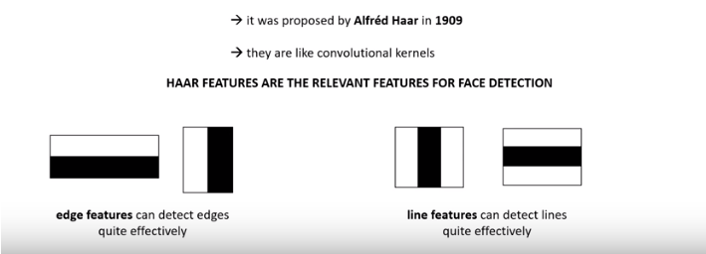

<br>
Now as you can see there are multiple types of features some look for the horizontal/vertical edges , some lines and so on. You can see below how these features are able to detect parts of face, for e.g consider an eyebrow which is like a white-black-white edge or simply a white-black feature, or a nose which is vertical black-white-black feature meaning a nose is usually whiter then the surrounding sides so we can construct a feature which can look for nose be describing it like its white and black on each side, ofcourse haar features do not look for exactly black or white areas but whitish or blackish areas. These are just for illustration.

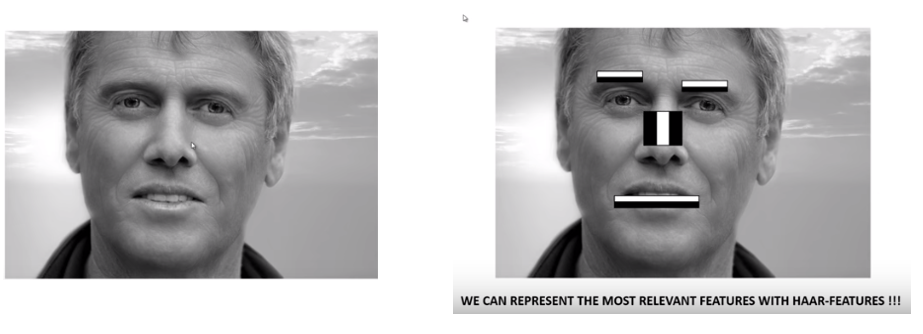

Now lets see these Cascades in action, below is a face haar cascade detector in action, see how it goes over the whole image checking for a face with multiple haar features, when it founds that enough features match on a given patch of an image it then classify that patch of image as a valid face, Now you can see that it goes over the image with a fixed window size but the image is scaled at multiples sizes so we can detect faces at different scales meaning we would be able to detect small & large faces effectively. Now you can see that it classifies a single face multiple times (Green box) this happens because the window slides over the image such that a single face would be present inside the window for possibly more than 1 time, Also the image is resized to different scales as discussed so the same window is able to detect the same face again. Now multiple detections of the same face is pretty interesting here because the Haar classifier gives many false positives (Classify non face object as faces). Now a true face would possibly be detected multiple time and a false face would not have that many detections, so what we do is tell the algorithm if something is classified as a face n times (normally n = 3 - 5) we then can positively classify that thing as a face otherwise we neglect that face as a false positive.

You can See Haar Cascades in action [here](https://www.youtube.com/watch?v=L0JkjIwz2II)

In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

##  <font style="color:rgb(134,19,348)">  Face detection    </font> 
Now lets use Haar cascades in Opencv , we will first use the face detection model then we will move on to eye detection. You first have to initilize the haar cascade with the model you want to use.

[```face_cascade = cv2.CascadeClassifier(xml_model_file)```](https://docs.opencv.org/4.2.0/d1/de5/classcv_1_1CascadeClassifier.html#ab3e572643114c43b21074df48c565a27)

- `xml_model_file:` This is your trained haar model in a `.xml` file

After the initlization here is the method to do detection.<br>
[```objects = cv2.CascadeClassifier.detectMultiScale( image[, scaleFactor[, minNeighbors[,flags[, minSize[, maxSize]]]]])```](https://docs.opencv.org/4.1.0/d1/de5/classcv_1_1CascadeClassifier.html#aaf8181cb63968136476ec4204ffca498)

**Params:*

- `minNeighbors:` These are the n detected objects to consider this an actual object (discussed above). 
- `image`	Matrix of the type CV_8U containing an image where objects are detected.
objects	Vector of rectangles where each rectangle contains the detected object, the rectangles may be partially outside the original image.
- `scaleFactor`	Parameter specifying how much the image size is reduced at each image scale.
- `minNeighbors`	Parameter specifying how many neighbors each candidate rectangle should have to retain it.
- `flags`	Parameter with the same meaning for an old cascade as in the function cvHaarDetectObjects. It is not used for a new cascade.
- `minSize`	Minimum possible object size. Objects smaller than that are ignored.
- `maxSize`	Maximum possible object size. Objects larger than that are ignored. If maxSize == minSize model is evaluated on single scale.

Now if you were doing face detection then the above method would return you the list of faces detected.

**Note:** *There is also maxsize and minsize params in the detectmultiscale method by which you can filter out some unnecessary faces , you can read more about it by looking up the method and in the resources*

Lets detect John Cena's face:
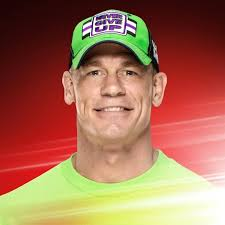

*Note: Its not a problem if you can't see the above image, its a common problem with this one*

In [42]:
# Read the image on which we want to apply face detection
image = cv2.imread('media/M4/john1.jpg')

# Initilizing the haar classifier with the face detector model
face_cascade = cv2.CascadeClassifier('media/M4/haarcascade_frontalface_default.xml')  

# perform the detection , here we are using 1.3 scale factor and 5 min neighbours
faces = face_cascade.detectMultiScale(image, 1.3, 5)

Now what we have is a list of faces as an array, since we have a single face we will have only a single array of x,y,w,h co-ordinates so an Object (face) is represented as 4 numbers , x,y is the top left corner of the object (face) and w,h is the width and height of the object (face).

In [43]:
# We can print out faces
print(faces)

[[64 34 99 99]]


Now printing the faces is not much fun lets draw a rectangle on the face, for that we nee the top right corner (already have it) and the bottom right corner (x2,y2). We can easily obtain the bottom right corner by adding w,h to x,y respectively i.e.
x2 = x + w and y2 = y + h

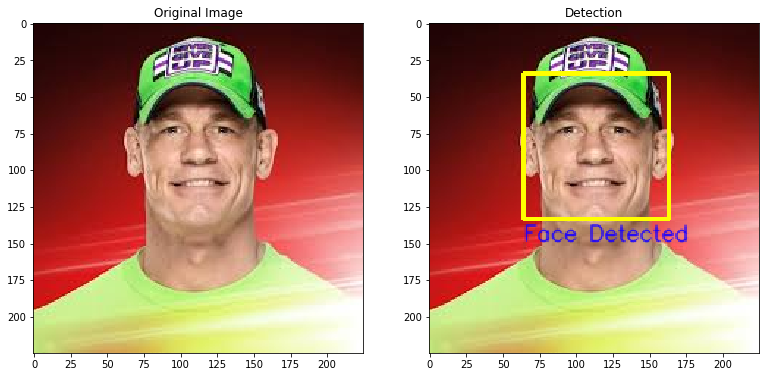

In [44]:
img_detection = image.copy()

# Since we only have a single image in our list we pass in 0
x,y,w,h=faces[0]

# We draw a rect on the face
cv2.rectangle(img_detection,(x,y),(x+w,y+h),(0,255,255),2)

#lets also put a text at bottom saying the face is detected
cv2.putText(img_detection,'Face Detected',(x,y+h+15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,25), 1, cv2.LINE_AA)   


plt.figure(figsize=[13,13])
plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Original Image");
plt.subplot(122);plt.imshow(img_detection[:,:,::-1]);plt.title("Detection");

###  <font style="color:rgb(134,19,348)">  Now lets detect another Image which has multiple faces. </font> 

In [59]:
image_2 = cv2.imread('media/M4/family.jpg')
faces_2 = face_cascade.detectMultiScale(image_2, 1.3, 3)

Lets see the number of people in this image

In [60]:
print('Number of people in this image is: {}'.format(len(faces_2)))

Number of people in this image is: 14


Woah 14 faces , we can check this by printing out all the faces

In [61]:
print(faces_2)

[[ 758  197   98   98]
 [ 818   43   79   79]
 [ 560  301  107  107]
 [1050  292  100  100]
 [  10  314   97   97]
 [ 500  109   98   98]
 [ 404   61   83   83]
 [ 330  133   89   89]
 [ 251   78   87   87]
 [ 912   70   89   89]
 [  18   51   87   87]
 [ 141   90   99   99]
 [ 595   54   92   92]
 [ 688   97   88   88]]


Now lets also draw faces rectangles around these faces too, the change here is that we will draw faces inside a loop because we have to draw each of 14 faces from a list.

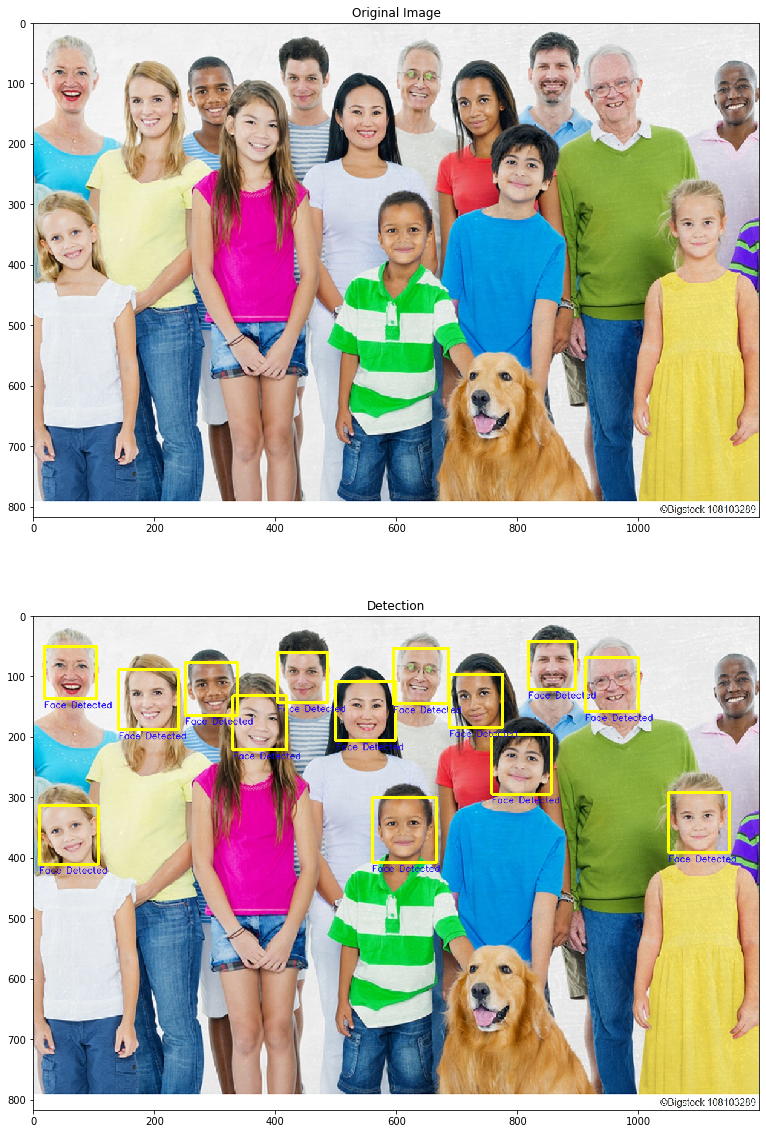

In [62]:
img_detection_2 = image_2.copy()

# loop through each face and draw it
for (x,y,w,h) in faces_2:
    cv2.rectangle(img_detection_2,(x,y),(x+w,y+h),(0,255,255),4)
    cv2.putText(img_detection_2,'Face Detected',(x,y+h+15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,25), 1, cv2.LINE_AA)   

plt.figure(figsize=[20,20])
plt.subplot(211);plt.imshow(image_2[:,:,::-1]);plt.title("Original Image");
plt.subplot(212);plt.imshow(img_detection_2[:,:,::-1]);plt.title("Detection");    

*Notice in the above Image the black guy at the right was'nt detected, so you can say that this model is biased towards white people or I would call the model racist*

## <font style="color:rgb(134,19,348)">   Eye Detection:  </font> 
Now lets do Eye detection with the Haar cascades , we can simply do that by just changing the model , the code remains the same.

In [63]:
#initilize the eye Cascade:
eye_cascade = cv2.CascadeClassifier('media/M4/haarcascade_eye.xml')

###  <font style="color:rgb(134,19,348)"> Important Tips on Eye Detection:</font> 
Now I know that I said the code remains the same but lets be smart here, we know the eyes lies on the face so why search for eyes on the whole image when we can just perform face detection first and then perform eye detection only on the face region.

Note you may be tempted to perform eye_detection on the whole image and be done with it, but there are two reasons that you should not do that.
1. If you search for Eyes on the whole image then you are bound to get a lot of false positives.
2. Its faster searching only on the faces compared to searching on the whole image. (provided you already have faces)
3. Not many people realize this but its more accurate to do just face detection and approximate the eye area rather than running an eye detector after, this is because face detector is a lot more accurate and can find face whereas the eye detector is pretty weak. We will not be covering the approximation in this notebook but its really easy. Just include the top roi of face. 

*Note these cascades use a sliding window on a image of variable size thus this algorithm will take longer on larger images*

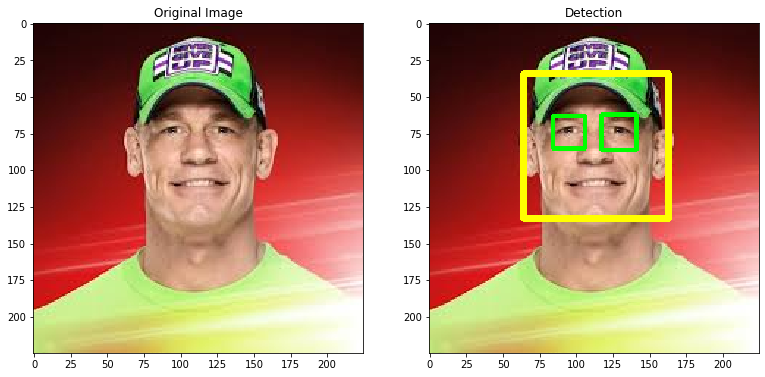

In [64]:
img_detection = image.copy()

# loop through each face and draw it
for (x,y,w,h) in faces:
    cv2.rectangle(img_detection,(x,y),(x+w,y+h),(0,255,255),4)

    # Extract roi of the face
    roi = img_detection[y:y+h, x:x+w]
    #perform eye detection with the default parameters i.e. 1.1 , 3
    eyes = eye_cascade.detectMultiScale(roi)  
    
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.figure(figsize=[13,13])
plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Original Image");
plt.subplot(122);plt.imshow(img_detection[:,:,::-1]);plt.title("Detection");    

## <font style="color:rgb(134,19,348)"> Face & Eye Detection on Real time Webcam Feed   </font> 
Now After learning how to perform both type of detections we can take all the above and apply it on a video feed, all you have to do is put all the code in the loop. <br>
**Note:** the initializations goes outside the loop, since we have already done the initializations we won't need to do it again

In [65]:
# This code is able to detect multiple faces in real time
cap = cv2.VideoCapture(0)

while 1:
    
        ret, img = cap.read()
        img = cv2.flip( img, 1 )
        faces = face_cascade.detectMultiScale(img, 1.3, 5)
        
        for (x,y,w,h) in faces:
                cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,255),2)
                cv2.putText(img,'Face Detected',(x+20,y+h+15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 2, cv2.LINE_AA) 
                
                roi = img[y:y+h, x:x+w]
                eyes = eye_cascade.detectMultiScale(roi)  
        
                for (ex,ey,ew,eh) in eyes:
                    cv2.rectangle(roi,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
               
        cv2.imshow('img',img)
        if cv2.waitKey(1) == ord('q'):
            break
            
cap.release()
cv2.destroyAllWindows()

## <font style="color:rgb(134,19,348)"> Face replacement with Image (Without Bg Removal) </font> 

Now lets do something interesting , remember last time we replaced joker's face manually with the some other image, Now we can automate that, we will do face detection to get the face of the person and replace it with any other image. First lets do this directly without changing the background. Since we are gonna be doing this on an image and a video it will be easier if we just write a method to do this , which is what we will do now.

In [66]:
def transfer(image, replacement_face, returnimage=False):
    
    faces = face_cascade.detectMultiScale(image, 1.3, 5)
    for (x,y,w,h) in faces:
        # To change roi with another image both must have equal shapes so our face shape must match replacement_face
        replacement_face_copy = cv2.resize(replacement_face, (w, h)) 
        # Now we can replace the detected face with replacement_face
        image[y:y+h,x:x+w] = replacement_face_copy
        
    # By default no need to return anything just show the image     
    if returnimage:
        return image
    else:
        cv2.imshow('img',image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

Now that we have built our method let's use it on an image

In [67]:
image_family = cv2.imread('media/M4/family.jpg')
replacement_face = cv2.imread('media/M4/cat2.jpg')
transfer(image_family.copy(), replacement_face.copy())

In [68]:
#lets do another one
image_cena = cv2.imread('media/m4/john1.jpg')
transfer(image_cena.copy(),  replacement_face.copy())

##  <font style="color:rgb(134,19,348)"> Face replacement in Live video (Without Bg Removal)  </font> 
Now lets try it on webcam 

In [69]:
cap = cv2.VideoCapture(0)
while 1:
        ret, img = cap.read()
        img = transfer(img,  replacement_face, returnimage = True)
        img = cv2.flip(img, 1)
        
        cv2.imshow('img',img)
        k = cv2.waitKey(1) 
        if k == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

##  <font style="color:rgb(134,19,348)"> Face Replacement in Image (With  Bg Removal)  </font> 
Now lets replace the image again but this time we will remove the background too, note since will not be using a transparent image we will need to use thresholding to get the mask of face_replacement image. We will also expand the face_replacement a little as the original image is really small.

**Note:** The techniques used here were taught in previous tutorial so will not be explained again.

In [70]:
def transfer_2(image, replacement_face, returnimage=False, expand=45,thresh=180):

    faces = face_cascade.detectMultiScale(image, 1.3, 5)       
    for (x,y,w,h) in faces:
        
        # Since our original face_replacement image is small we expand it by a custom value
        w= w+expand                                         
        h= h+expand    
        
        # Since we just increased our original w,h by add expand we must now center the image  
        x = int(x-(expand/2))                                 
        y = int(y-(expand/2))                                 
            
        replacement_face_copy = cv2.resize(replacement_face, (w,h))  
        rows,cols,channels =  replacement_face_copy.shape
        roi = image[y:y+h, x:x+w]
        img2gray = cv2.cvtColor(replacement_face_copy,cv2.COLOR_BGR2GRAY)
        ret, mask = cv2.threshold(img2gray, thresh, 255, cv2.THRESH_BINARY)
        mask_inv = cv2.bitwise_not(mask)
        
        # This is to handle faces going out of the boundry cause they will throw an error
        try:
            img_bg = cv2.bitwise_and(roi,roi,mask = mask)
        except:
            continue
        img_fg = cv2.bitwise_and(replacement_face_copy,replacement_face_copy,mask = mask_inv)
        combined = cv2.add(img_bg,img_fg)
        image[y:y+h, x:x+w] = combined
        

    if returnimage:
        return image
    else:
        cv2.imshow('img',image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

**Now lets test out the function**

In [78]:
transfer_2(image_family.copy(), replacement_face.copy(),thresh=230)

**We can reduce the expand to bring back the close to border detections**

In [77]:
transfer_2(image_family.copy(), replacement_face.copy(),expand=20,thresh=230)

##  <font style="color:rgb(134,19,348)">  Face Replacement In Live Video (With Bg Removal )  </font> 
Now lets try this one on Webcam

In [79]:
replacement_face = cv2.imread('media/M4/thejoker.jpg')
cap = cv2.VideoCapture(0)

while 1:
        ret, img = cap.read()
        img = transfer_2(img,  replacement_face, returnimage = True,expand=100,thresh=240)
        img = cv2.flip(img, 1)
        
        cv2.imshow('img',img)
        k = cv2.waitKey(1) 
        if k == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

### <font style="color:rgb(34,169,134)"> Add Borders to avoid Errors on Facial Masks </font>
**In this assignment you have to think how you can add avoid the errors encountered when you overlay cat face for the people at the edge of the image, Tip: you can solve this by adding borders and then cropping the image.**

In [ ]:
## ADD CODE HERE

